# Sample Analysis

This analysis is an example of how you can analyze the previous season data. Hopefully, that'll inform you on how to draft for the next season

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/previous_season_data.csv")

In [3]:
df.shape

(27862, 24)

In [4]:
df.head()

,slug,name,team,location,opponent,outcome,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,...,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,game_score,date
0,curryst01,Stephen Curry,Team.GOLDEN_STATE_WARRIORS,Location.HOME,Team.OKLAHOMA_CITY_THUNDER,Outcome.WIN,2197,11,20,5,...,8,8,9,1,0,3,4,32,27.5,2018-10-16
1,simmobe01,Ben Simmons,Team.PHILADELPHIA_76ERS,Location.AWAY,Team.BOSTON_CELTICS,Outcome.LOSS,2565,7,14,0,...,12,15,8,4,2,3,5,19,21.7,2018-10-16
2,duranke01,Kevin Durant,Team.GOLDEN_STATE_WARRIORS,Location.HOME,Team.OKLAHOMA_CITY_THUNDER,Outcome.WIN,2263,9,21,0,...,7,8,6,1,1,3,4,27,19.6,2018-10-16
3,tatumja01,Jayson Tatum,Team.BOSTON_CELTICS,Location.HOME,Team.PHILADELPHIA_76ERS,Outcome.WIN,1736,9,17,1,...,7,9,3,1,0,1,2,23,19.1,2018-10-16
4,schrode01,Dennis Schröder,Team.OKLAHOMA_CITY_THUNDER,Location.AWAY,Team.GOLDEN_STATE_WARRIORS,Outcome.LOSS,2045,7,19,2,...,6,8,6,3,1,3,4,21,16.6,2018-10-16


Turns out we get more than just average data, but data for each player for each game. This is way better, because we can dig deeper into the data rather than looking at the surface level

In [5]:
player_slugs = df["slug"].unique()

## Points

Let's get the average value for each player, the way we normally look at player, ordered by points per game descending

In [6]:
df.groupby("slug").mean().sort_values(by="points", ascending=False)

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,game_score
slug,,,,,,,,,,,,,,,,,
hardeja01,2218.573034,10.696629,24.415730,4.786517,13.089888,9.393258,10.741573,0.842697,5.831461,6.674157,7.404494,2.044944,0.764045,4.921348,3.202247,35.573034,26.121348
georgpa01,2228.280488,9.158537,20.914634,3.743902,9.804878,6.012195,7.182927,1.353659,6.829268,8.182927,4.097561,2.158537,0.426829,2.743902,2.865854,28.073171,21.059756
leonaka01,2128.333333,9.559524,19.345238,1.988095,5.321429,6.607143,7.642857,1.571429,6.250000,7.821429,3.488095,1.738095,0.488095,2.321429,1.702381,27.714286,22.076190
curryst01,2094.582418,9.032967,19.461538,4.901099,11.582418,4.516484,4.879121,0.681319,4.824176,5.505495,5.351648,1.274725,0.318681,2.835165,2.571429,27.483516,20.632967
jamesle01,2113.545455,10.145455,19.909091,2.018182,5.945455,5.054545,7.600000,1.036364,7.418182,8.454545,8.254545,1.309091,0.600000,3.581818,1.709091,27.363636,22.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loftoza01,225.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-0.700000
ulisty01,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hollajo02,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now let's look at the standard deviation of these stats to see how they fluctuate, ordered by greatest ppg fluctuation

In [7]:
df.groupby("slug").std().sort_values(by="points", ascending=False)

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,game_score
slug,,,,,,,,,,,,,,,,,
bookede01,405.071697,3.712778,5.750410,1.470527,2.883829,3.837440,4.366971,0.809020,2.174665,2.315354,2.947919,1.000000,0.442923,1.947730,1.385870,10.286183,8.737638
davisan02,467.659716,3.893885,6.393483,0.942503,1.846636,3.951656,4.266108,1.855494,3.906538,4.627978,2.188221,1.248376,1.436875,1.401298,1.285281,10.111842,9.481725
walkeke02,271.575290,3.712512,5.352270,1.897398,2.982257,3.619263,4.125332,0.728811,2.289529,2.382341,2.417068,1.222838,0.627580,1.735828,1.174416,10.052347,9.117261
hardeja01,265.240324,3.072623,6.154837,2.086057,3.797848,4.874838,5.316202,1.010163,2.788923,3.107086,3.346365,1.551466,0.879340,2.073780,1.262931,9.955455,9.679588
curryst01,319.666738,3.078421,5.051529,2.436094,3.660801,3.290939,3.441044,0.854779,2.253853,2.455713,2.432985,1.054787,0.555360,1.529442,1.415336,9.421444,8.837911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qizh01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
siberjo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
simmoko01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interestingly, Devin Booker has the greatest fluctuation, then AD, then Kemba.

### Efficient Scoring

I also want to see points per game based on minutes played

In [8]:
df["minutes_played"] = df["seconds_played"]/60

In [9]:
df_avg = df.groupby("slug").mean()
df_avg["points_per_minute"] = df_avg["points"]/df_avg["minutes_played"]
df_avg.sort_values(by="points_per_minute", ascending=False)[["minutes_played", "points_per_minute"]]

,minutes_played,points_per_minute
slug,,
qizh01,0.950000,2.105263
hardeja01,36.976217,0.962052
duvaltr01,1.861111,0.895522
antetgi01,33.014176,0.827579
embiijo01,33.182000,0.796818
...,...,...
kingge03,5.900000,0.000000
whiteok01,2.088889,0.000000
ulisty01,0.816667,0.000000


Obviously, players who have low minutes might randomly do better. If I played for 2 minutes once, and scored 2 points, I would seem like a god in this scenario. So let's arbitrarily show players who played more than 5 minutes per game, which we know removes end-of-the-bench type players

In [10]:
df_avg[df_avg["minutes_played"] > 5].sort_values(by="points_per_minute", ascending=False)[["minutes_played", "points_per_minute"]]

,minutes_played,points_per_minute
slug,,
hardeja01,36.976217,0.962052
antetgi01,33.014176,0.827579
embiijo01,33.182000,0.796818
curryst01,34.909707,0.787274
davisan02,33.034821,0.784886
...,...,...
acyqu01,12.291667,0.138305
moreler01,5.491026,0.126080
evansja01,8.043750,0.093240


In [11]:
df_avg[df_avg["minutes_played"] > 5].sort_values(by="points_per_minute", ascending=False)[["minutes_played", "points_per_minute"]].head(15)

,minutes_played,points_per_minute
slug,,
hardeja01,36.976217,0.962052
antetgi01,33.014176,0.827579
embiijo01,33.182000,0.796818
curryst01,34.909707,0.787274
davisan02,33.034821,0.784886
leonaka01,35.472222,0.781295
jamesle01,35.225758,0.776808
duranke01,34.924630,0.768003
bookede01,35.033333,0.758206


Harden was hyper efficient. The gap between him and Giannis (2nd) is greater than the gap between Giannis and Kyrie (15th). Interesting argument for MVP that season.

### Scoring Improvements

Let's try to find the rate of scoring improvement for all players. First, let's try it on one and see if it works

In [12]:
import numpy as np

In [13]:
df_harden = df[df["slug"] == "hardeja01"]
N = df_harden.shape[0]
m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_harden["points"].values)[0]
print(m)
print(c)

0.02424242424242396
34.5063670411985


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


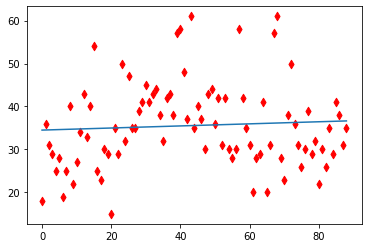

In [14]:
import matplotlib.pyplot as plt
x = np.arange(N)
plt.scatter(range(N), df_harden["points"].values,color='r',marker='d')
plt.plot(x, m*x+c)
plt.show()

Now we'll apply to all players

In [15]:
from tqdm import tqdm

def get_player_ppg_fit(player_slug):
    df_player = df[df["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player["points"].values)[0]
    return m, c

player_ppg_improvement = []
for player_slug in tqdm(player_slugs, desc="Each player"):
    m, c = get_player_ppg_fit(player_slug)
    player_ppg_improvement.append((player_slug, m, c))

df_ppg_improvement = pd.DataFrame(player_ppg_improvement, columns=["slug", "slope", "y-intercept"])

Each player:   0%|          | 0/530 [00:00<?, ?it/s]/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
Each player: 100%|██████████| 530/530 [00:02<00:00, 181.15it/s]


In [16]:
df_ppg_improvement.sort_values(by="slope", ascending=False)

,slug,slope,y-intercept
469,bradlto01,7.5,-1.833333e+00
500,hicksis01,5.0,-1.000000e+00
511,zellety01,2.4,1.666667e+00
529,matenya01,2.0,-2.405856e-16
507,joneste01,2.0,-2.405856e-16
...,...,...,...
491,terryem01,-2.0,5.333333e+00
462,youngni01,-2.1,5.400000e+00
524,sampsja02,-2.2,2.330000e+01
497,delgaan01,-3.0,3.000000e+00


In [17]:
def plot_player_stat(player_slug, stat="points"):
    df_player = df[df["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player[stat].values)[0]
    x = np.arange(N)
    plt.scatter(range(N), df_player[stat].values,color='r',marker='d')
    plt.plot(x, m*x+c)
    plt.show()

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


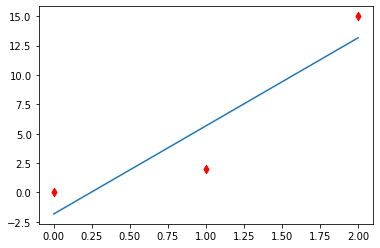

In [18]:
plot_player_stat("bradlto01")

In [19]:
def get_name_from_slug(slug):
    print(df[df["slug"] == slug]["name"].unique()[0])

In [20]:
get_name_from_slug("bradlto01")

Tony Bradley


Well, Tony Bradley only played 3 games. Let's filter for players who has played at least half the season (41 games)

In [21]:
df.groupby("slug").count().sort_values("name", ascending=False)

,name,team,location,opponent,outcome,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,...,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,game_score,date,minutes_played
slug,,,,,,,,,,,,,,,,,,,,,
siakapa01,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
greenda02,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
gasolma01,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
looneke01,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
thompkl01,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lucaska01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mccalta01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
stephdj01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [22]:
df_player_game_count = df.groupby("slug").count()["name"]
df_player_game_count[df_player_game_count >= 42]

slug
adamsst01    85
adebaba01    82
aldrila01    88
allenja01    85
aminual01    97
             ..
youngth01    85
youngtr01    81
zelleco01    49
zizican01    59
zubaciv01    63
Name: name, Length: 354, dtype: int64

In [23]:
player_ppg_improvement = []
for player_slug in tqdm(df_player_game_count[df_player_game_count >= 42].index.values, desc="Each player"):
    m, c = get_player_ppg_fit(player_slug)
    player_ppg_improvement.append((player_slug, m, c))

df_ppg_improvement = pd.DataFrame(player_ppg_improvement, columns=["slug", "slope", "y-intercept"])

Each player:   0%|          | 0/354 [00:00<?, ?it/s]/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
Each player: 100%|██████████| 354/354 [00:01<00:00, 202.62it/s]


In [24]:
df_ppg_improvement.sort_values(by="slope", ascending=False)

,slug,slope,y-intercept
92,dorsety01,0.241750,0.485544
186,kaminfr01,0.232308,3.273936
328,valanjo01,0.221735,10.249796
250,noahjo01,0.211328,2.763012
170,jacksfr01,0.210894,1.787943
...,...,...,...
145,hernaju01,-0.159203,11.370526
134,hardati02,-0.167832,23.432168
226,mcgruro01,-0.171986,13.210764
81,davisan02,-0.191456,31.193609


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


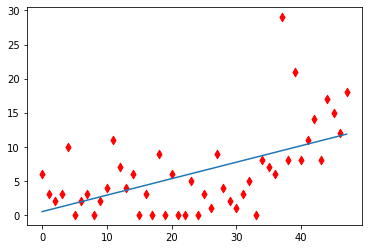

Tyler Dorsey


In [25]:
plot_player_stat("dorsety01")
get_name_from_slug("dorsety01")

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


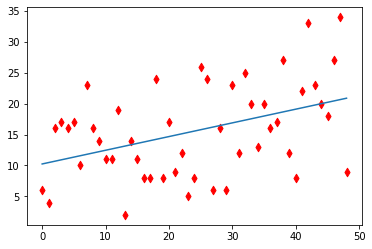

Jonas Valančiūnas


In [26]:
plot_player_stat("valanjo01")
get_name_from_slug("valanjo01")

The slope tells you how a player has improved, and the y-intercept tells you how goood they were to begin with. While Tyler Dorsey has improved more than JV has improved, JV started at a better rate while results in him ultimately having higher stats at the end of the season.

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


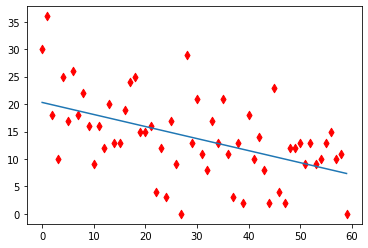

Nikola Mirotić


In [27]:
plot_player_stat("mirotni01")
get_name_from_slug("mirotni01")

Conversely, Mirotic started off pretty decent, and had a pretty steep dropoff by the end of the season

Let's concat this dataframe with our average dataframe

In [28]:
df_avg_with_improvement = pd.concat((df_avg, df_ppg_improvement.set_index("slug")), axis=1)
df_avg_with_improvement = df_avg_with_improvement.dropna()
df_avg_with_improvement.head()

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,total_rebounds,...,steals,blocks,turnovers,personal_fouls,points,game_score,minutes_played,points_per_minute,slope,y-intercept
adamsst01,1996.647059,5.988235,10.011765,0.000000,0.035294,1.752941,3.529412,4.741176,4.623529,9.364706,...,1.435294,0.952941,1.694118,2.552941,13.729412,13.577647,33.277451,0.412574,-0.068634,16.612038
adebaba01,1399.463415,3.414634,5.926829,0.036585,0.182927,2.024390,2.756098,2.012195,5.268293,7.280488,...,0.865854,0.792683,1.475610,2.475610,8.890244,9.329268,23.324390,0.381157,0.056998,6.581840
aldrila01,1998.227273,8.397727,16.363636,0.147727,0.602273,4.272727,5.056818,3.068182,6.147727,9.215909,...,0.545455,1.295455,1.715909,2.272727,21.215909,17.320455,33.303788,0.637042,0.044724,19.270429
allenja01,1557.341176,4.164706,7.058824,0.070588,0.529412,2.517647,3.505882,2.423529,5.882353,8.305882,...,0.541176,1.447059,1.305882,2.317647,10.917647,11.025882,25.955686,0.420626,-0.029939,12.175103
aminual01,1664.628866,3.041237,7.237113,1.144330,3.412371,1.824742,2.154639,1.453608,5.865979,7.319588,...,0.793814,0.443299,0.907216,1.824742,9.051546,8.216495,27.743814,0.326255,-0.015872,9.813381


Let's see players who's PPG is similar to JV's

In [29]:
df_avg_with_improvement = df_avg_with_improvement.sort_values(by=["points", "slope"], ascending=False).reset_index()
df_avg_with_improvement = df_avg_with_improvement.rename(columns={"index": "slug"})

In [30]:
jv_index = df_avg_with_improvement[df_avg_with_improvement["slug"] == "valanjo01"].index[0]
df_avg_with_improvement[jv_index-5:jv_index+5][["slug", "points", "slope", "y-intercept"]]

,slug,points,slope,y-intercept
61,paulch01,15.840580,-0.000585,15.860455
62,tatumja01,15.681818,-0.030467,17.007150
63,capelca01,15.653846,-0.080818,18.765336
64,nurkiju01,15.625000,0.043813,14.069635
65,goberru01,15.581395,0.017435,14.840417
66,valanjo01,15.571429,0.221735,10.249796
67,bledser01,15.548387,-0.011280,16.067261
68,jacksre01,15.476744,0.020105,14.622294
69,schrode01,15.392857,-0.015541,16.037815
70,brogdma01,15.380282,-0.008115,15.664319


Interestingly, Capela ranks higher than JV in ppg, but he has a somewhat significant negative slope. Let's look at how Capela played through this season

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


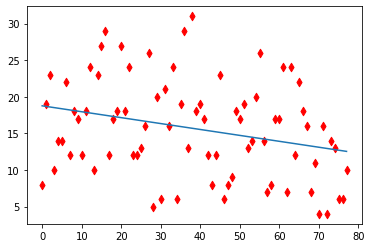

Clint Capela


In [32]:
plot_player_stat("capelca01")
get_name_from_slug("capelca01")

While he started the season off strong, his points per game decreased through the season while JV's stats went up, even though Capela's PPG average is higher than JV's. This type of improvement/decrease is important to note for drafting the following season

## Rebounds

Let's quickly look at rebounds

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


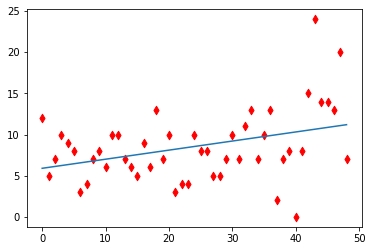

Jonas Valančiūnas


In [34]:
plot_player_stat("valanjo01", stat="total_rebounds")
get_name_from_slug("valanjo01")

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


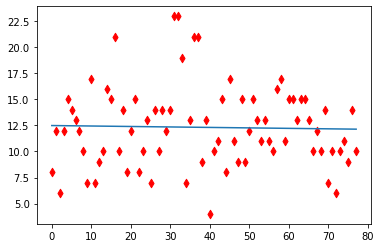

Clint Capela


In [35]:
plot_player_stat("capelca01", stat="total_rebounds")
get_name_from_slug("capelca01")

JV improved on rebounds as well. Capela is surprisingly really consistent throughout the year with his rebounds, having maybe only a slight dip

## Next Steps

This just shows a bit of what can be achieved in the data. While rebounds was lightly touched on, you can dive deeper into rebounds. This analysis can be also reproduced for assists, blocks, steals, FG%, 3pt FG%, FT%, 3s made, etc calculate which player is worth drafting the following season. Of course, you can combine stats to calculate stats such as [PER](https://www.basketball-reference.com/about/per.html), [offensive and defensive rating](https://www.basketball-reference.com/about/ratings.html), and [Win Shares](https://www.basketball-reference.com/about/ws.html)